<center>
<img src="logo.png" height="900"> 
</center>


#  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами. Делать это задание необязательно, но рекомендуется. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## Упражнение 1 

> Нормальность восстановлена, мы на орбите Магратеи (Автостопом по галактике) 

__а)__ Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

norm_rv = sts.norm(loc=4, scale=10)  

### BEGIN SOLUTION
norm_rv = sts.norm(4, 10)
### END SOLUTION

__б)__ Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p1 = 1 - norm_rv.cdf(4) 
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)

### BEGIN SOLUTION
p1 = 1 - norm_rv.cdf(4)
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)
### END SOLUTION

In [6]:
# Проверка корректно ли вы нашли вероятности :) 
# Задание необязательное, поэтому все тесты открытые

assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5

__в)__ Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

a = norm_rv.ppf(0.7)

### BEGIN SOLUTION
a = norm_rv.ppf(0.7)
### END SOLUTION

In [8]:
assert np.abs(a - 9.2440051) < 1e-5

__г)__ Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

b = ...

### BEGIN SOLUTION
rv = sts.norm(0, 10)
b = rv.ppf(1.5/2)
norm_rv.cdf(4 + b) - norm_rv.cdf(4 - b)
### END SOLUTION

np.float64(0.5)

In [8]:
assert np.abs(b - 6.7448975) < 1e-5

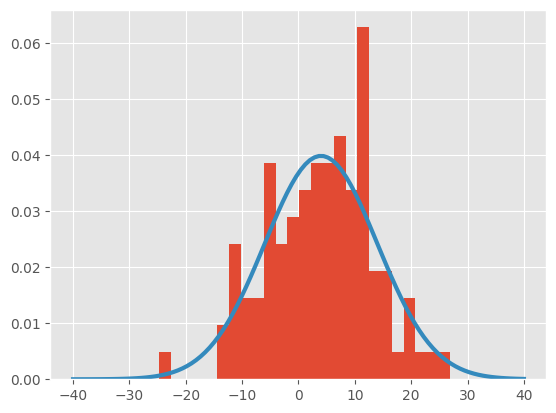

In [20]:
sample = norm_rv.rvs(100)
x = np.linspace(-40, 40, 100)
pdf = norm_rv.pdf(x)
plt.hist(sample, bins = 25, density = True)
plt.plot(x, pdf, lw = 3)

__д)__ Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

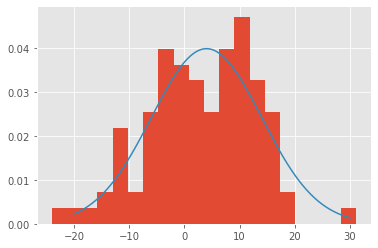

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

### BEGIN SOLUTION
x = norm_rv.rvs(100)
plt.hist(x, density=True, bins=20)
xs = np.linspace(-20, 30, 300)
ys = norm_rv.pdf(xs)
plt.plot(xs, ys);
### END SOLUTION

In [24]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB 6.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.9 MB 6.9 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.9 MB 5.8 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.9 MB 5.4 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 4.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.9 MB 4.1 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.9 MB 3.9 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.9 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 3.8 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.9 MB 3.8 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 3.8 MB/s eta 0:00:01
   ----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pychallonge 1.11.5 requires pytz==2019.3, but you have pytz 2024.2 which is incompatible.


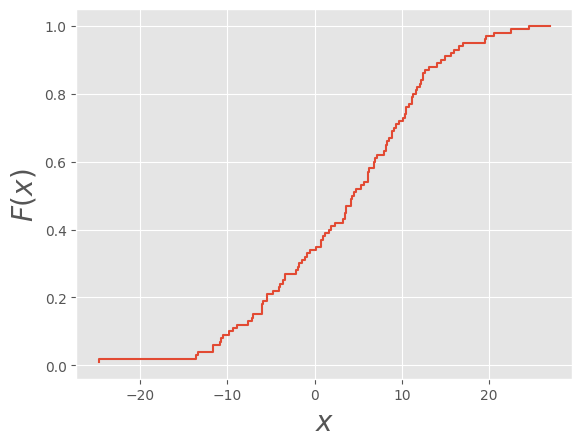

In [25]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

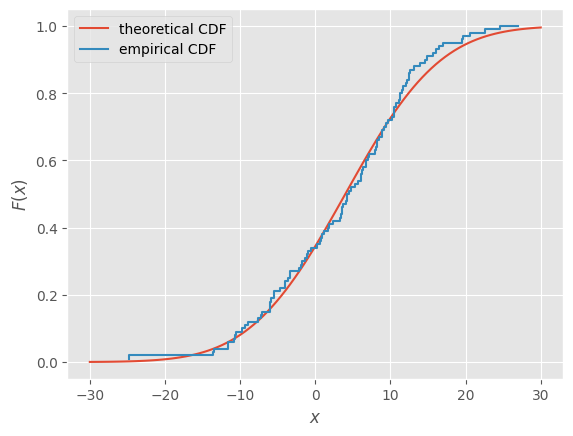

In [27]:
x = np.linspace(-30, 30, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

__е)__ Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

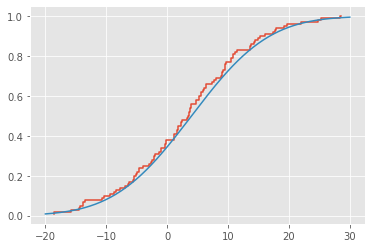

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

### BEGIN SOLUTION
from statsmodels.distributions.empirical_distribution import ECDF
x = norm_rv.rvs(100)
ecdf = ECDF(x)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
ys = norm_rv.cdf(xs)
plt.plot(xs, ys);
### END SOLUTION

## Упражнение 2 

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам. (Дайте танк) 

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [38]:
prob = sts.poisson.sf(4, 3)
prob

np.float64(0.18473675547622787)

In [34]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = ...

### BEGIN SOLUTION
# 1 - P(X <= 4) = 1 - F(4)
p = 1 - sts.poisson(3).cdf(4)
p
### END SOLUTION

np.float64(0.1847367554762278)

In [12]:
assert np.abs(p - 0.1847367) < 1e-5

## Упражнение 3 

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [40]:
sts.binom.pmf(12, 14, 0.5)

np.float64(0.005554199218750005)

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = ...

### BEGIN SOLUTION
p = sts.binom(14, 0.5).pmf(12)
### END SOLUTION

In [14]:
assert np.abs(p - 0.0055541) < 1e-5

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат? 

In [43]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = sts.binom.pmf(12, 14, 0.9)

### BEGIN SOLUTION
p = sts.binom(14, 0.9).pmf(12)
### END SOLUTION
p

np.float64(0.25701087819770996)

In [16]:
assert np.abs(p - 0.2570108) < 1e-5